In [101]:
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

In [102]:
import sys
sys.path.append('../')
from guia2.bimodal import fit_bimodal, normal

In [103]:
PLOT_DIST = False

# Catalogos

In [104]:
s1, s2, s3 = 'cluster', 'field', 'sim'

In [105]:
# Colores
c_cl='#7b3294'
c_fie = '#008837'
c_sa = '#ff7f00'

In [106]:
s = {}

# === Cluster galaxies
# Pe, Ps: probability to be elliptical or sprials (from galaxy zoo)
s[s1] = pd.read_fwf(
    'sample1_cls.dat', 
    names=['cls','ra','dec','z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','class','Zc','sigma','Mvir','Rvir','R200','w','dist','Pe','Ps'],
    skiprows=1
)
# === Field galaxies
s[s2] = pd.read_fwf(
    'sample2_field.dat', 
    names=['ra','dec','z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','OH','w','Pe','Ps'],
    skiprows=1
)

# === Semi-analytic model
semianalytic = pd.read_fwf(
    'sample3_sim.dat', 
    names=['cls','ig','type','clase','stellarmass','u','g','r','sfr','Mcoldgas','Mhotgas','Tau','OH','bt','ssfr'],
    skiprows=1
)
semianalytic['ur'] = semianalytic['u']-semianalytic['r']


## `sample1.dat` $\rightarrow{}$ Cluster objects

| columnas | descripción |
|:--------:|:-----------|
|'z' | redshift|
|'Mr01'| magnitud absoluta en la banda r a 0.1|
|'ur'| color u-r|
|'mur'| brillo superficial|
|'kr50'| r_50 en kpc(?)|
|'C'| indice de concentración|
|'stellarmass'| masa estelar|
|'sfr'| tasa de formación estelar [$M_{\odot} \mathrm{yr}^{-1}$]|
|'ssfr'| tasa de formación estelar especifica [?]|
|'Dn4000'| 4000 A break (ratio between the average flux density between 4050 and<br> 4250A and that between 3750 and 3950A) [$\mathrm{ergs}^{−1} \mathrm{cm}^{−2} \mathrm{Hz}^{−1}$] |
|'class'| tipo de galaxia en el cúmulo (-1,1,2,3,4,5) (?)|
|'Zc'| redshift del cluster|
|'sigma'| dispersión de velocidad (?)|
|'Mvir'| masa encerrada al radio virial|
|'Rvir'| radio virial|
|'R200'| radio que encierra 200 veces la densidad media del Universo|
|'w'| peso $1/V_{max}$|
|'dist'| distancia al centro del cumulo normalizada por R200|
|'Pe'| probabilidad de ser eliptica, según galaxy-zoo|
|'Ps'| probabilidad de ser espiral, según galaxy-zoo|


In [107]:
s['cluster'].query('Rvir < 30 and C<4.5 and Dn4000<2.5 and Dn4000>0.5', inplace=True)

In [108]:
if PLOT_DIST:
    fig, axes = plt.subplots(4,5, figsize=(15,10))
    cols = ['z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000', 'sigma','Mvir','Rvir','R200', 'w','Pe','Ps']

    for col, ax in zip(cols,axes.flatten()):
        ax.hist(s[s1][col], bins='auto', label=col, histtype='step', color=c_cl)
        ax.legend(loc='upper right')

## `sample2.dat` $\rightarrow{}$ Field objects

| columnas | descripción |
|:--------:|:-----------|
|'z' | redshift|
|'Mr01'| magnitud absoluta en la banda r a 0.1|
|'ur'| color u-r|
|'mur'| brillo superficial|
|'kr50'| r_50 en kpc(?)|
|'C'| indice de concentración|
|'stellarmass'| masa estelar|
|'sfr'| tasa de formación estelar [$M_{\odot} \mathrm{yr}^{-1}$]|
|'ssfr'| tasa de formación estelar especifica [?]|
|'Dn4000'| 4000 A break (ratio between the average flux density between 4050 and<br> 4250A and that between 3750 and 3950A) [$\mathrm{ergs}^{−1} \mathrm{cm}^{−2} \mathrm{Hz}^{−1}$] |
|'OH'| metalicidad|
|'w'| peso $1/V_{max}$|
|'dist'| distancia al centro del cumulo (?)|
|'Ps'| probabilidad de ser espiral, según galaxy-zoo|

In [109]:
s['field'].query('stellarmass > 8 and sfr > -8 and ur < 5 and kr50 < 20 and C < 5 and ur > 0 and Dn4000<2.5 and Dn4000>0.8 and Ps>0 and Pe>0', inplace=True)

In [110]:
if PLOT_DIST:
    fig, axes = plt.subplots(4,4, figsize=(10,10))
    cols = ['z','Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','OH','w','Pe','Ps']

    for col, ax in zip(cols,axes.flatten()):
        if col=='OH':
            ax.hist(s[s2][col], bins=np.linspace(7.8,9.5,25), label=col, histtype='step', color=c_fie)
        else:
            ax.hist(s[s2][col], bins='auto', label=col, histtype='step', color=c_fie)
        
        ax.legend(loc='upper right')

## `sample3.dat` $\rightarrow{}$ Semi-analytic model

| columnas | descripción |
|:--------:|:-----------|
|'cls' | cluster id |
|'ig' | galaxy id |
|'type'| (?) |
|'stellarmass'| masa estelar|
|'u'| u band magnitude|
|'g'| g band magnitude|
|'r'| r band magnitude|
|'sfr'| tasa de formación estelar [$M_{\odot} \mathrm{yr}^{-1}$]|
|'Mcoldgas'| masa de gas frio [$\log M_{\odot}$] |
|'Mhotdgas'| masa de gas caliente [$\log M_{\odot}$] |
|'Tau'| edad de la galaxia [?]|
|'OH'| (?) |
|'bt'| (?) |
|'ssfr'| tasa de formación estelar especifica [?]|

In [111]:
semianalytic.query('Mhotgas != 99 and Mcoldgas != 99 and sfr!=99', inplace=True)

In [112]:
if PLOT_DIST:
    fig, axes = plt.subplots(3,4, figsize=(10,10))
    cols = ['stellarmass','u','g','r','sfr','Mcoldgas','Mhotgas','Tau','OH','bt','ssfr']

    for col, ax in zip(cols,axes.flatten()):
        ax.hist(semianalytic[col], bins='auto', label=col, histtype='step', color=c_sa)
        ax.legend(loc='upper right')

# Field + Clusters

Text(0.5, 0, 'redshift')

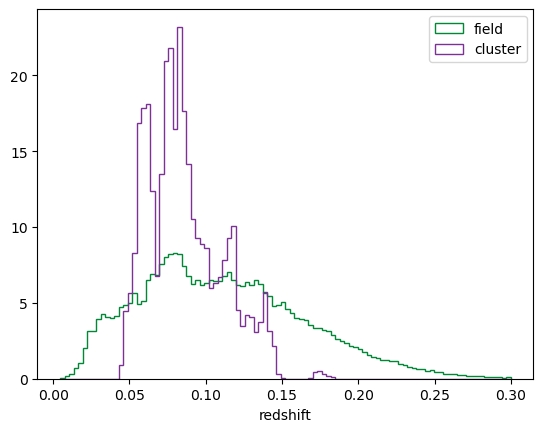

In [113]:
# redshift distributions

fig, ax = plt.subplots()
h, b, _ = ax.hist(s[s2]['z'], bins=100, density=True, histtype='step', label=s2, color=c_fie)
ax.hist(s[s1]['z'], bins=b, density=True, histtype='step', label=s1, color=c_cl)
ax.legend()
#plt.semilogy()
ax.set_xlabel('redshift')

In [118]:
redshift_cut = 'z < 0.14 and z > 0.05 and Mr01>-22.5'
s_zcut = {}

for k,v in s.items():
    s_zcut[k] = v.query(redshift_cut, inplace=False)

Text(0.5, 0, 'redshift')

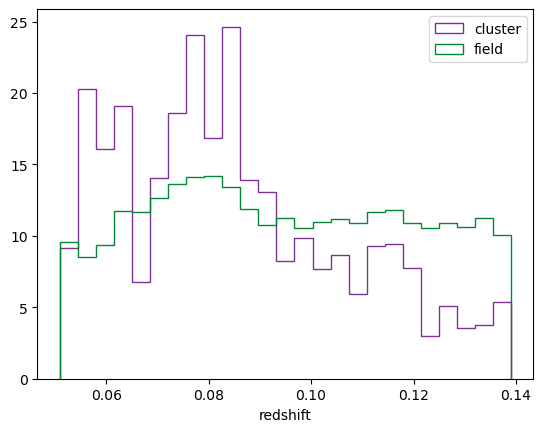

In [119]:
# redshift distributions

fig, ax = plt.subplots()
h, b, _ = ax.hist(s_zcut[s1]['z'], bins=25, density=True, histtype='step', label=s1, color=c_cl)
ax.hist(s_zcut[s2]['z'], bins=b, density=True, histtype='step', label=s2, color=c_fie)
ax.legend()
#plt.semilogy()
ax.set_xlabel('redshift')

Text(0, 0.5, 'Magnitud')

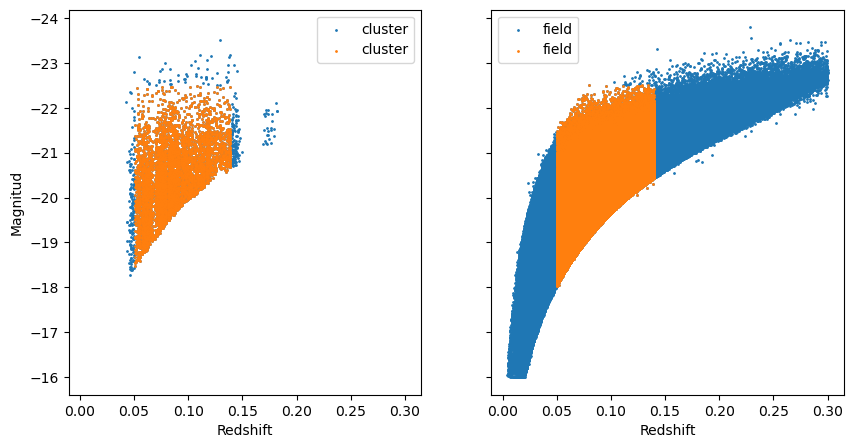

In [121]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
for ax, sample in zip(axes.flatten(), [s1, s2]): 
    ax.scatter(s[sample]['z'], s[sample]['Mr01'], s=1, label=sample)
    ax.scatter(s_zcut[sample]['z'], s_zcut[sample]['Mr01'], s=1, label=sample)
    ax.legend()
    ax.set_xlabel('Redshift')

axes[0].invert_yaxis()
axes[0].set_ylabel('Magnitud')

Histogramas de las galaxias de campo pesados por $1/V_{\mathrm{max}}$

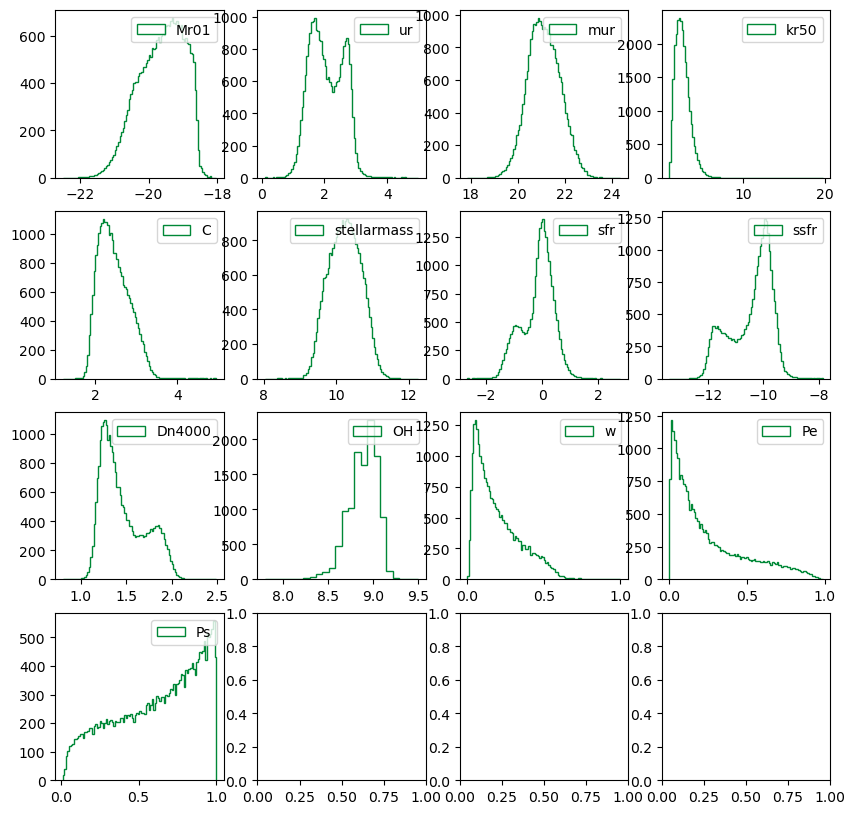

In [124]:
if not PLOT_DIST:
    fig, axes = plt.subplots(4,4, figsize=(10,10))
    cols = ['Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000','OH','w','Pe','Ps']

    for col, ax in zip(cols,axes.flatten()):
        if col=='OH':
            ax.hist(s_zcut[s2][col], bins=np.linspace(7.8,9.5,25), weights=s_zcut[s2]['w'], label=col, histtype='step', color=c_fie)
        else:
            ax.hist(s_zcut[s2][col], bins=100, weights=s_zcut[s2]['w'], label=col, histtype='step', color=c_fie)
        
        ax.legend(loc='upper right')

Galaxias de cluster con histogramas pesados

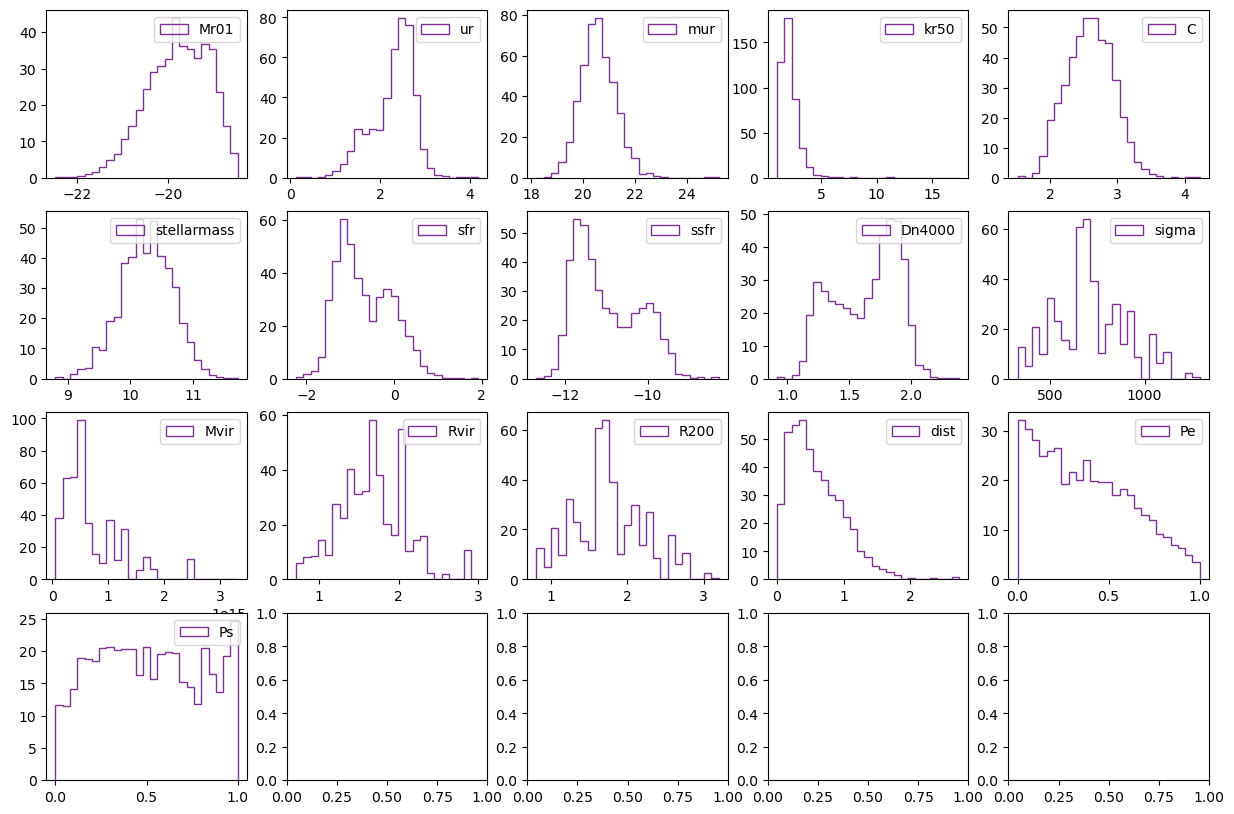

In [125]:
if not PLOT_DIST:
    fig, axes = plt.subplots(4,5, figsize=(15,10))
    cols = ['Mr01','ur','mur','kr50','C','stellarmass','sfr','ssfr','Dn4000', 'sigma','Mvir','Rvir','R200', 'dist','Pe','Ps']

    for col, ax in zip(cols,axes.flatten()):
        if col=='OH':
            ax.hist(s_zcut[s1][col], bins=np.linspace(7.8,9.5,25), weights=s_zcut[s1]['w'], label=col, histtype='step', color=c_cl)
        else:
            ax.hist(s_zcut[s1][col], bins=25, weights=s_zcut[s1]['w'], label=col, histtype='step', color=c_cl)
        
        ax.legend(loc='upper right')

Comparando field-clusters

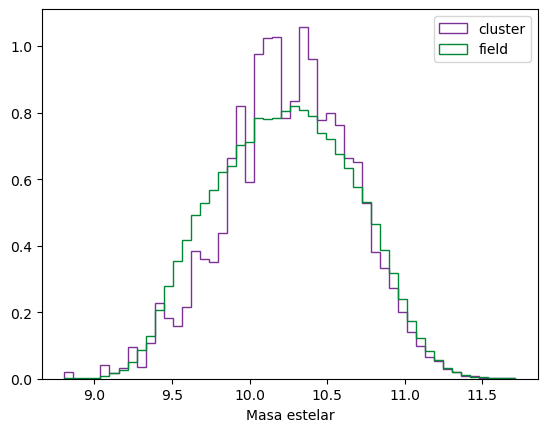

In [126]:

fig, ax = plt.subplots()
_, b, _ = ax.hist(s_zcut['cluster']['stellarmass'], bins=50, label='cluster', histtype='step', weights=s_zcut['cluster']['w'], density=True, color=c_cl)
ax.hist(s_zcut['field']['stellarmass'], bins=b, label='field', histtype='step', weights=s_zcut['field']['w'], density=True, color=c_fie)
ax.set_xlabel('Masa estelar')
ax.legend()
plt.show()

In [127]:
# son muestras similares?
ks_res = ks_2samp(s_zcut['cluster']['stellarmass'], s_zcut['field']['stellarmass'], method='exact')
print('pvalue =', ks_res.pvalue)
if ks_res.pvalue > 0.05:
    print('La información no es suficiente para rechazar la hip. nula')
else:
    print('Las muestras son diferentes')

pvalue = 9.99553727823006e-16
Las muestras son diferentes


In [128]:
# Por qué?
# debemos estudiar todo en intervalos de masa

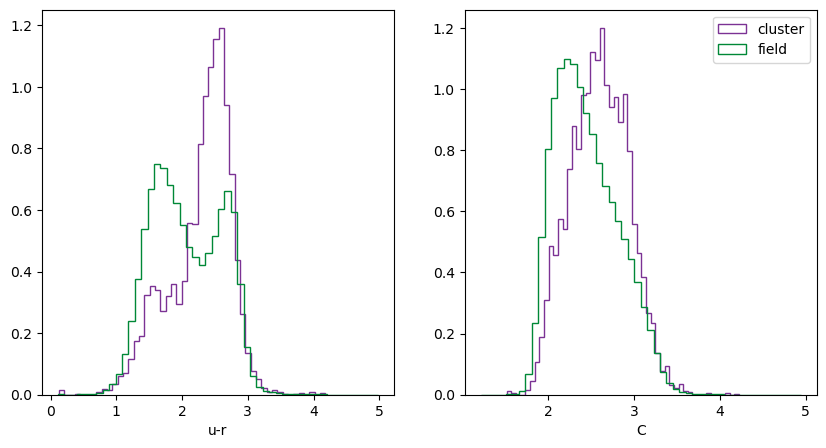

In [129]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
for (k,v),c in zip(s_zcut.items(), [c_cl, c_fie]):
    ax1.hist(v['ur'], bins=50, weights=v['w'], density=True, histtype='step', label=k, color=c)
    ax2.hist(v['C'], bins=50, weights=v['w'], density=True, histtype='step', label=k, color=c)

ax1.set_xlabel('u-r')
ax2.set_xlabel('C')
ax2.legend()
plt.show()


In [130]:
for col in ['ur', 'C']:
    ks_res = ks_2samp(s_zcut['cluster'][col], s_zcut['field'][col], method='exact')
    print('pvalue =', ks_res.pvalue)
    if ks_res.pvalue > 0.05:
        print('La información no es suficiente para rechazar la hip. nula')
    else:
        print(f'Las muestras de {col} son diferentes')

pvalue = 1.3407849025694056e-258
Las muestras de ur son diferentes
pvalue = 1.2642066745751796e-178
Las muestras de C son diferentes


Podemos ver del histograma de color que las galaxias en cúmulos son pobres en galaxias azules en comparación con la muestra de galaxias de campo, donde la distribución es claramente bimodal. Además, las galaxias de cúmulo tienen concentraciones mayores que el campo, lo que implica que las galaxias de cumulo son mayormente early-type

In [131]:
ur_fit = {}
ur_fit['field'] = fit_bimodal(s_zcut['field']['ur'], weights=s_zcut['field']['w'], p0=[0.5,1.5,0.3,0.5,2.5,0.2])
ur_fit['cluster'] = fit_bimodal(s_zcut['cluster']['ur'], weights=s_zcut['cluster']['w'], p0=[0.5,1.5,0.3,0.5,2.5,0.2])

popt=array([0.65995682, 1.73768307, 0.350708  , 0.34929408, 2.6524955 ,
       0.2221121 ]), 
np.sqrt(np.diag(cov))=array([0.01528299, 0.00898479, 0.00982589, 0.0130953 , 0.00855655,
       0.00838531])
chisq(y, yfit)=75498670716.91257
popt[0]+popt[3]=1.0092509017607363
popt=array([0.30012997, 1.71109865, 0.35442207, 0.6971876 , 2.52020843,
       0.24130004]), 
np.sqrt(np.diag(cov))=array([0.0251528 , 0.03339693, 0.03153382, 0.02333233, 0.00736389,
       0.00625148])
chisq(y, yfit)=149978.5050201133
popt[0]+popt[3]=0.9973175702622079


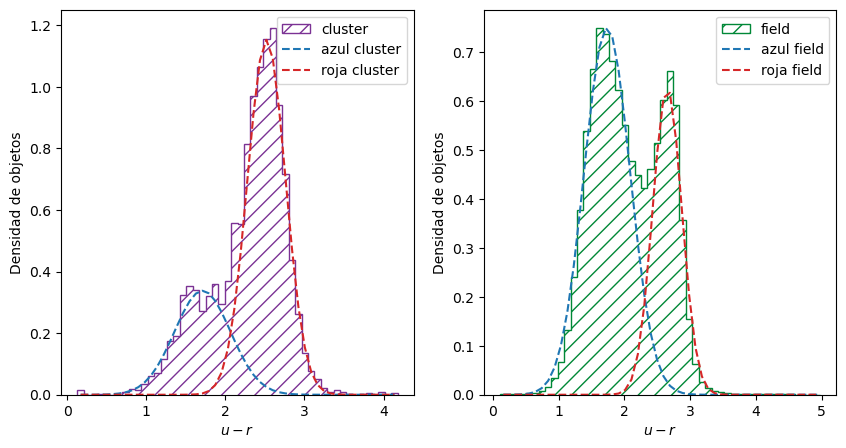

In [132]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

for ax, s, c in zip(axes, [s1,s2], [c_cl, c_fie]): 
    ax.stairs(edges=ur_fit[s]['xedges'], values=ur_fit[s]['y'], hatch='//', label=s, color=c)
    # ax.plot(ur_fit[s]['x'], ur_fit[s]['yfit'], label=f'bim {s}', c='k', lw=2)
    ax.plot(
        ur_fit[s]['x'], 
        ur_fit[s]['popt'][0]*normal(
            ur_fit[s]['x'],ur_fit[s]['popt'][1],ur_fit[s]['popt'][2]
        ), 
        label=f'azul {s}', c='C0', ls='--'
    )
    ax.plot(
        ur_fit[s]['x'], 
        ur_fit[s]['popt'][3]*normal(
            ur_fit[s]['x'],ur_fit[s]['popt'][4],ur_fit[s]['popt'][5]
        ), 
        label=f'roja {s}', c='C3', ls='--'
    )

    ax.set_xlabel('$u-r$')
    ax.set_ylabel('Densidad de objetos')

    ax.legend()
#plt.show()

In [133]:
# Diagrama color-magnitud
GS = 25
LEVELS = 5
LW = np.linspace(0.8, 2.5, LEVELS)

In [149]:
def fit_colormag(G, col='Mr01', plots=False):
    q = np.quantile(G[col], [0.20, 0.4, 0.6, 0.8])
    print(q)

    mask = [
        G[col]<q[0],
        (G[col]<q[1])&(G[col]>q[0]),
        (G[col]<q[2])&(G[col]>q[1]),
        (G[col]<q[3])&(G[col]>q[2]),
        G[col]>q[3]
    ]
    
    quantiles = [f'$M_r<{q[0]:2.2f}$',f'${q[0]:2.2f}<M_r<{q[1]:2.2f}$',f'${q[1]:2.2f}<M_r<{q[2]:2.2f}$',f'${q[2]:2.2f}<M_r<{q[3]:2.2f}$',f'$M_r>{q[3]:2.2f}$']
    mean_mag = [0.5*(G[col].min()+q[0]), 0.5*(q[0]+q[1]), 0.5*(q[1]+q[2]), 0.5*(q[2]+q[3]), 0.5*(q[3]+G[col].max())]

    fits = [fit_bimodal(G['ur'][mask[i]], p0=[0.5, 1.5, 0.3, 0.5, 2.5, 0.2], nbins=np.linspace(0.5,4,50)) for i in range(len(q)+1)]

    if plots:
        for i in range(len(q)+1):
            ax.errorbar(mean_mag[i],fits[i]['popt'][1],fits[i]['popt'][2], fmt='o', markerfacecolor='b', elinewidth=1.5, ecolor='k', markeredgecolor='k')
            ax.plot(mean_mag[i],fits[i]['popt'][1],c='r')
            ax.errorbar(mean_mag[i],fits[i]['popt'][4],fits[i]['popt'][5], fmt='o', markerfacecolor='r', elinewidth=1.5, ecolor='k', markeredgecolor='k')
            ax.plot(mean_mag[i],fits[i]['popt'][4],c='b')
    
        fig2, axes = plt.subplots(2,3, sharex=True, sharey=True, figsize=(5,5))
        fig2.subplots_adjust(wspace=0.1, hspace=0.2)
        axesflat = axes.flatten()
        for i in range(len(q)+1):
            axesflat[i].stairs(edges=fits[i]['xedges'], values=fits[i]['y'],
                    hatch='///', color='dimgray')
            axesflat[i].plot(fits[i]['x'], fits[i]['yfit'],
                    c='k', lw=1.8, alpha=0.8)
            axesflat[i].plot(fits[i]['x'], fits[i]['popt'][0]*normal(fits[i]['x'], *fits[i]['popt'][1:3]),
                    c='b', ls='--')
            axesflat[i].plot(fits[i]['x'], fits[i]['popt'][3]*normal(fits[i]['x'], *fits[i]['popt'][4:]),
                    c='r', ls='--')
            axesflat[i].set_title(quantiles[i], fontsize=9)
    
        axesflat[1].plot([],[], c='r', label='Sec. roja')
        axesflat[1].plot([],[], c='b', label='Nube azul')
        axesflat[1].plot([],[], c='k', label='Ajuste bimodal')
        #axesflat[1].stairs([],[], c='dimgray', hatch='///', label='SDSS')
        #axesflat[1].legend()
    
        fig2.text(0.5, 0.04, '$u-r$', ha='center')
        fig2.text(0.04, 0.5, 'Densidad de galaxias', va='center', rotation='vertical')

    return mean_mag, fits


In [151]:
mean_Mr01_cl, fits_ur_cl = fit_colormag(s_zcut[s1])
mean_Mr01_f, fits_ur_f = fit_colormag(s_zcut[s2])

mean_Mass_cl, fits_mass_cl = fit_colormag(s_zcut[s1], col='stellarmass')
mean_Mass_f, fits_mass_f = fit_colormag(s_zcut[s2], col='stellarmass')



[-21.089 -20.664 -20.286 -19.829]
popt=array([0.12448186, 2.05848463, 0.22629742, 0.86478794, 2.81078421,
       0.20248165]), 
np.sqrt(np.diag(cov))=array([0.01954078, 0.03937491, 0.04253542, 0.0186762 , 0.00483255,
       0.00508836])
chisq(y, yfit)=102374.15485733825
popt[0]+popt[3]=0.9892697976800565
popt=array([0.32294604, 2.3277938 , 0.59998167, 0.69104459, 2.73452734,
       0.16709306]), 
np.sqrt(np.diag(cov))=array([0.04177062, 0.09094718, 0.06189882, 0.03065141, 0.00434313,
       0.0054116 ])
chisq(y, yfit)=0.6866364494483399
popt[0]+popt[3]=1.0139906389112374
popt=array([0.37667124, 2.21214665, 0.54752921, 0.6351742 , 2.65846019,
       0.14640393]), 
np.sqrt(np.diag(cov))=array([0.04030079, 0.07085925, 0.04711296, 0.02798235, 0.00382247,
       0.00479195])
chisq(y, yfit)=0.7395190318376038
popt[0]+popt[3]=1.0118454424871448
popt=array([0.46320687, 2.12795745, 0.49832571, 0.5423583 , 2.60369933,
       0.14675368]), 
np.sqrt(np.diag(cov))=array([0.05056212, 0.0658609 , 0.0

In [152]:
mu_cl_b = [fits_cl[i]['popt'][1] for i in range(5)]
sigma_cl_b = [fits_cl[i]['popt'][2] for i in range(5)]
mu_cl_r = [fits_cl[i]['popt'][4] for i in range(5)]
sigma_cl_r = [fits_cl[i]['popt'][5] for i in range(5)]

mu_f_b = [fits_f[i]['popt'][1] for i in range(5)]
sigma_f_b = [fits_f[i]['popt'][2] for i in range(5)]
mu_f_r = [fits_f[i]['popt'][4] for i in range(5)]
sigma_f_r = [fits_f[i]['popt'][5] for i in range(5)]

mu_mass_cl_b = [fits_cl[i]['popt'][1] for i in range(5)]
sigma_mass_cl_b = [fits_cl[i]['popt'][2] for i in range(5)]
mu_mass_cl_r = [fits_cl[i]['popt'][4] for i in range(5)]
sigma_mass_cl_r = [fits_cl[i]['popt'][5] for i in range(5)]

mu_mass_f_b = [fits_f[i]['popt'][1] for i in range(5)]
sigma_mass_f_b = [fits_f[i]['popt'][2] for i in range(5)]
mu_mass_f_r = [fits_f[i]['popt'][4] for i in range(5)]
sigma_mass_f_r = [fits_f[i]['popt'][5] for i in range(5)]

(0.5, 3.5)

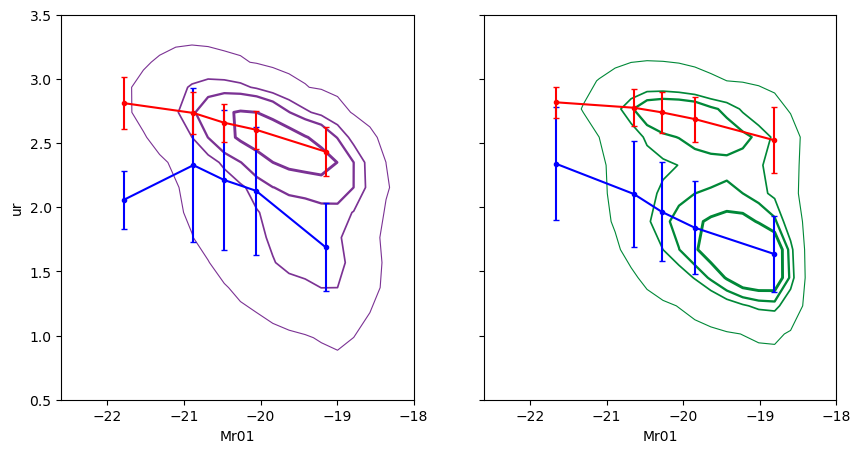

In [148]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5), sharex=True, sharey=True)
# Cluster
sns.kdeplot(s_zcut[s1], x='Mr01', y='ur', weights='w', gridsize=GS, levels=5, linewidths=LW, color=c_cl, ax=ax1)
ax1.errorbar(mean_Mr01_cl, mu_cl_b, yerr=sigma_cl_b, fmt='.-', capsize=2, color='b')
ax1.errorbar(mean_Mr01_cl, mu_cl_r, yerr=sigma_cl_r, fmt='.-', capsize=2, color='r')

# Field
sns.kdeplot(s_zcut[s2], x='Mr01', y='ur', weights='w', gridsize=GS, levels=5, linewidths=LW, color=c_fie, ax=ax2)
ax2.errorbar(mean_Mr01_f, mu_f_b, yerr=sigma_f_b, fmt='.-', capsize=2, color='b')
ax2.errorbar(mean_Mr01_f, mu_f_r, yerr=sigma_f_r, fmt='.-', capsize=2, color='r')

ax1.set_xlim(-22.6, -18)
ax1.set_ylim(0.5,3.5)

(0.5, 3.5)

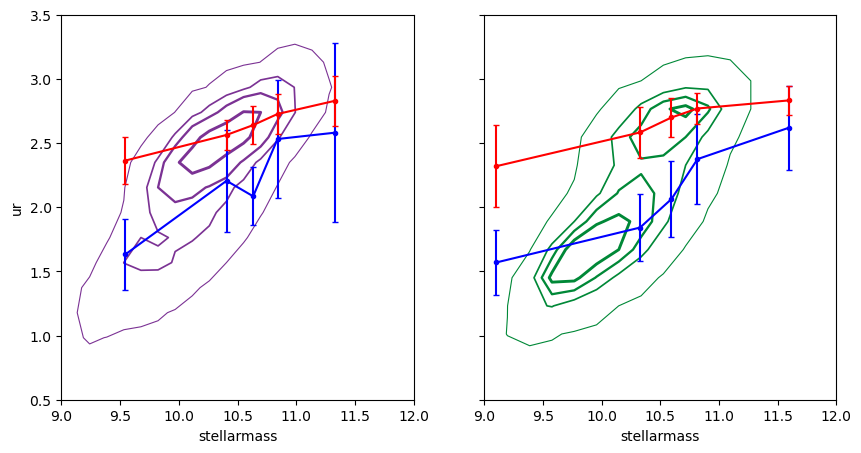

In [155]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5), sharex=True, sharey=True)
# Cluster
sns.kdeplot(s_zcut[s1], x='stellarmass', y='ur', weights='w', gridsize=GS, levels=5, linewidths=LW, color=c_cl, ax=ax1)
ax1.errorbar(mean_Mass_cl, mu_mass_cl_b, yerr=sigma_mass_cl_b, fmt='.-', capsize=2, color='b')
ax1.errorbar(mean_Mass_cl, mu_mass_cl_r, yerr=sigma_mass_cl_r, fmt='.-', capsize=2, color='r')

# Field
sns.kdeplot(s_zcut[s2], x='stellarmass', y='ur', weights='w', gridsize=GS, levels=5, linewidths=LW, color=c_fie, ax=ax2)
ax2.errorbar(mean_Mass_f, mu_mass_f_b, yerr=sigma_mass_f_b, fmt='.-', capsize=2, color='b')
ax2.errorbar(mean_Mass_f, mu_mass_f_r, yerr=sigma_mass_f_r, fmt='.-', capsize=2, color='r')

ax1.set_xlim(9, 12)
ax1.set_ylim(0.5,3.5)

(0.01, 7.0)

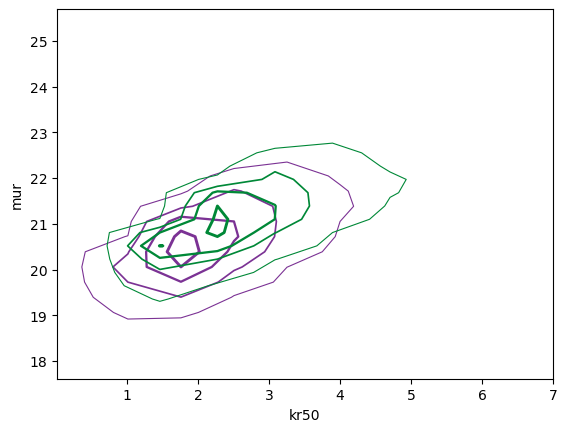

In [146]:
fig, ax = plt.subplots(sharex=True, sharey=True)
sns.kdeplot(s_zcut[s1], x='kr50', y='mur', weights='w', gridsize=GS, levels=5, linewidths=LW, color=c_cl, ax=ax)
sns.kdeplot(s_zcut[s2], x='kr50', y='mur', weights='w', gridsize=GS, levels=5, linewidths=LW, color=c_fie, ax=ax)
ax.set_xlim(0.01, 7.0)

# etc

In [29]:
from astropy.cosmology import Planck18 as cosmo

cosmo.angular_diameter_distance_z1z2(0.06, 0.14)

<Quantity 296.05258317 Mpc>